In [135]:
# Importing packages

import pandas as pd # data processing
import numpy as np # working with arrays
import itertools # construct specialized tools
import matplotlib.pyplot as plt # visualizations
from matplotlib import rcParams # plot size customization
from termcolor import colored as cl # text customization
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.metrics import precision_score # evaluation metric
from sklearn.metrics import classification_report # evaluation metric
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import log_loss # evaluation metric
import pickle


In [136]:
df = pd.read_csv('/home/snekha/datasets/worked_hrs.csv')

In [137]:
df.head()

,first_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Result
0,Louisette Bardwell,2,6,8,7,8,7,9,Y
1,Barbabas Guilloud,5,1,8,6,9,3,0,N
2,Langston Maynell,9,6,3,8,3,11,9,Y
3,Wynn Oddie,3,5,5,0,9,4,2,N
4,Tabby Crank,2,1,4,6,4,10,5,Y


In [138]:
df.drop(['first_name'], 
        axis = 1, inplace = True)

In [139]:
df.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Result
0,2,6,8,7,8,7,9,Y
1,5,1,8,6,9,3,0,N
2,9,6,3,8,3,11,9,Y
3,3,5,5,0,9,4,2,N
4,2,1,4,6,4,10,5,Y


In [140]:
# for i  in df.columns:
#     df[i] = df[i].astype(int)

In [141]:
df = df.replace({'Result':{'Y':'1'}})

In [142]:
df = df.replace({'Result':{'N':'0'}})

In [143]:
df

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Result
0,2,6,8,7,8,7,9,1
1,5,1,8,6,9,3,0,0
2,9,6,3,8,3,11,9,1
3,3,5,5,0,9,4,2,0
4,2,1,4,6,4,10,5,1
...,...,...,...,...,...,...,...,...
135,1,3,0,1,2,1,1,0
136,0,1,1,2,0,2,1,0
137,1,3,3,3,3,0,3,0
138,3,0,0,4,0,0,3,0


In [144]:
for i  in df.columns:
     df[i] = df[i].astype(int)

In [145]:
df.describe()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Result
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,4.300000,4.164286,4.242857,4.121429,4.142857,5.692857,5.085714,0.492857
std,2.944816,2.932357,2.789681,2.632032,2.937163,3.879287,3.496114,0.501744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,0.000000
75%,7.000000,7.000000,6.000000,6.000000,7.000000,9.000000,8.000000,1.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,14.000000,12.000000,1.000000


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Monday     140 non-null    int64
 1   Tuesday    140 non-null    int64
 2   Wednesday  140 non-null    int64
 3   Thursday   140 non-null    int64
 4   Friday     140 non-null    int64
 5   Saturday   140 non-null    int64
 6   Sunday     140 non-null    int64
 7   Result     140 non-null    int64
dtypes: int64(8)
memory usage: 8.9 KB


In [147]:

X_var = np.asarray(df[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']])
y_var = np.asarray(df['Result'])

print(cl('X_var samples : ', attrs = ['bold']), X_var[:5])
print(cl('y_var samples : ', attrs = ['bold']), y_var[:5])

X_var samples :  [[ 2  6  8  7  8  7  9]
 [ 5  1  8  6  9  3  0]
 [ 9  6  3  8  3 11  9]
 [ 3  5  5  0  9  4  2]
 [ 2  1  4  6  4 10  5]]
y_var samples :  [1 0 1 0 1]


In [163]:
X_var = StandardScaler().fit(X_var).transform(X_var)
X_var = (X_var -np.min(X_var))/(np.max(X_var)-np.min(X_var))
print(cl(X_var[:5], attrs = ['bold']))

[[0.21 0.59 0.79 0.72 0.78 0.51 0.72]
 [0.49 0.13 0.79 0.61 0.87 0.24 0.03]
 [0.85 0.59 0.3  0.82 0.32 0.79 0.72]
 [0.3  0.5  0.5  0.   0.87 0.3  0.18]
 [0.21 0.13 0.4  0.61 0.41 0.72 0.42]]


In [165]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.10, random_state = 45)

In [166]:
lr = LogisticRegression(C = 0.1, solver = 'liblinear')
lr.fit(X_train,y_train)

print(cl(lr, attrs = ['bold']))

LogisticRegression(C=0.1, solver='liblinear')


In [167]:
yhat = lr.predict(X_test)
yhat_prob = lr.predict_proba(X_test)

In [168]:
print(cl('Precision Score of our model is {}'.format(precision_score(y_test, yhat).round(2)), attrs = ['bold']))


Precision Score of our model is 1.0


In [169]:
print(cl('Log Loss of our model is {}'.format(log_loss(y_test, yhat).round(2)), attrs = ['bold']))

Log Loss of our model is 0.0


In [170]:

print(cl(classification_report(y_test, yhat), attrs = ['bold']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



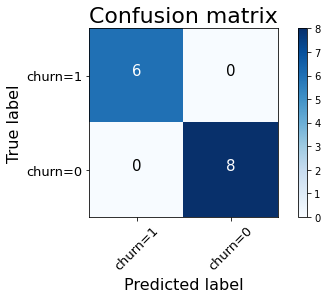

In [171]:

# 5. Confusion matrix

def plot_confusion_matrix(cm, classes,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 22)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, fontsize = 13)
    plt.yticks(tick_marks, classes, fontsize = 13)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 fontsize = 15,
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)

# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, yhat, labels = [1,0])
np.set_printoptions(precision = 2)


# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['churn=1','churn=0'], normalize = False,  title = 'Confusion matrix')

In [172]:
pickle.dump(lr, open('model.pkl','wb'))

In [173]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(X_train, y_train)
print(logModel_grid.best_estimator_)


Fitting 10 folds for each of 30 candidates, totalling 300 fits
LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234,
                   solver='newton-cg')


In [175]:
y_pred = logModel_grid.predict(X_test)
print(y_pred)

[1 1 1 1 0 1 1 0 0 0 0 0 0 0]


In [176]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix \n")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[8 0]
 [0 6]] : is the confusion matrix 

1.0 : is the accuracy score
1.0 : is the precision score
1.0 : is the recall score
1.0 : is the f1 score
